In [108]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [109]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [110]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'tech', 'stable', 'max_full',
       'total', 'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+',
       '6c', '6c+', '7a', '7a+', '4F2G', '3F2G', '16', '12', '15°', '35°',
       'sloper', 'pinch', '2F2G'],
      dtype='object')

In [111]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # technique
    'tech': boulder_6a_plus / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    'pinch'
]

gymnastics = ['block', 'core', 'anta', 'legs', 'L-Sit',]
climbing = ['4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',]


def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        
    
def calc_gym_scores(row):
    s = [row[key] * scores_translator[key] for key in gymnastics]
    return sum(s)

def calc_climbing_scores(row):
    s = [row[key] * scores_translator[key] for key in climbing]
    return sum(s)

def calc_arc_scores(row):
    s = [row[key] * scores_translator[key] for key in ['arc']]
    return sum(s)

def calc_technique_scores(row):
    s = [row[key] * scores_translator[key] for key in ['tech']]
    return sum(s)

In [112]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
gym_scores = sessions.apply(calc_gym_scores, axis=1)
climbing_scores = sessions.apply(calc_climbing_scores, axis=1)
arc_scores = sessions.apply(calc_arc_scores, axis=1)
tech_scores = sessions.apply(calc_technique_scores, axis=1)


sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions['gym_scores'] = gym_scores
sessions['climbing_scores'] = climbing_scores
sessions['arc_scores'] = arc_scores
sessions['tech_scores'] = tech_scores

In [113]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

# Doripa: Five last entries

In [114]:
doripa.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
41,581.0,0.0,0.0,0.0,0.0
42,346.0,0.0,486.0,579.0,400.0
45,491.0,0.0,534.0,750.0,0.0
47,359.0,184.8,418.4,0.0,0.0
48,616.0,453.6,963.6,810.0,0.0


# Doripa: Maximal sessions

In [115]:
doripa[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    1357.0
tech_scores         453.6
gym_scores          963.6
hang_scores         810.0
arc_scores          400.0
dtype: float64

# Sunshine: Last five scores

In [116]:
sunshine_sessions.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
38,348.0,0.0,0.0,0.0,0.0
40,451.0,0.0,0.0,336.0,0.0
43,0.0,0.0,0.0,396.0,0.0
44,279.0,0.0,412.0,453.0,0.0
46,230.0,155.4,0.0,0.0,0.0


# Sunshine: Maximal Sessions

In [117]:
sunshine_sessions[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    556.0
tech_scores        155.4
gym_scores         412.0
hang_scores        453.0
arc_scores           0.0
dtype: float64

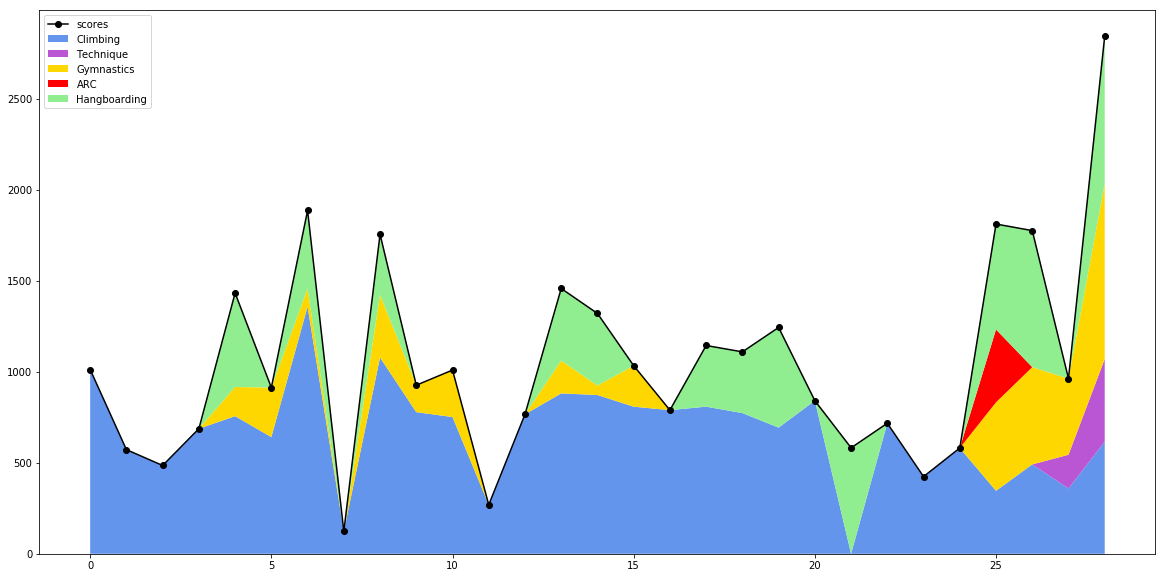

In [118]:

plt.figure(figsize=(20,10))

x = np.arange(len(doripa))
scores = [
    doripa.climbing_scores,

    doripa.tech_scores,
    doripa.gym_scores,
    doripa.arc_scores,

    doripa.hang_scores,

]
labels = ['Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding',  ]
colors = [ 'cornflowerblue','mediumorchid', 'gold', 'red', 'lightgreen', ]

y = np.vstack(scores)
plt.stackplot(x, y, labels=labels, colors=colors)
plt.plot(x, doripa.scores, marker='o', color='black')
plt.legend(loc=2)
plt.show()


/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


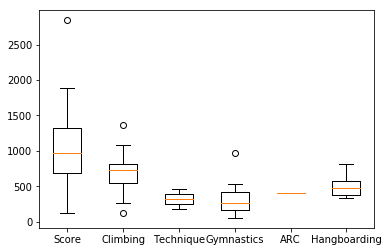

In [119]:
scores = [
    doripa[doripa.scores > 0].scores,
    doripa[doripa.climbing_scores > 0].climbing_scores,

    doripa[doripa.tech_scores > 0].tech_scores,
    doripa[doripa.gym_scores > 0].gym_scores,
    doripa[doripa.arc_scores > 0].arc_scores,

    doripa[doripa.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()

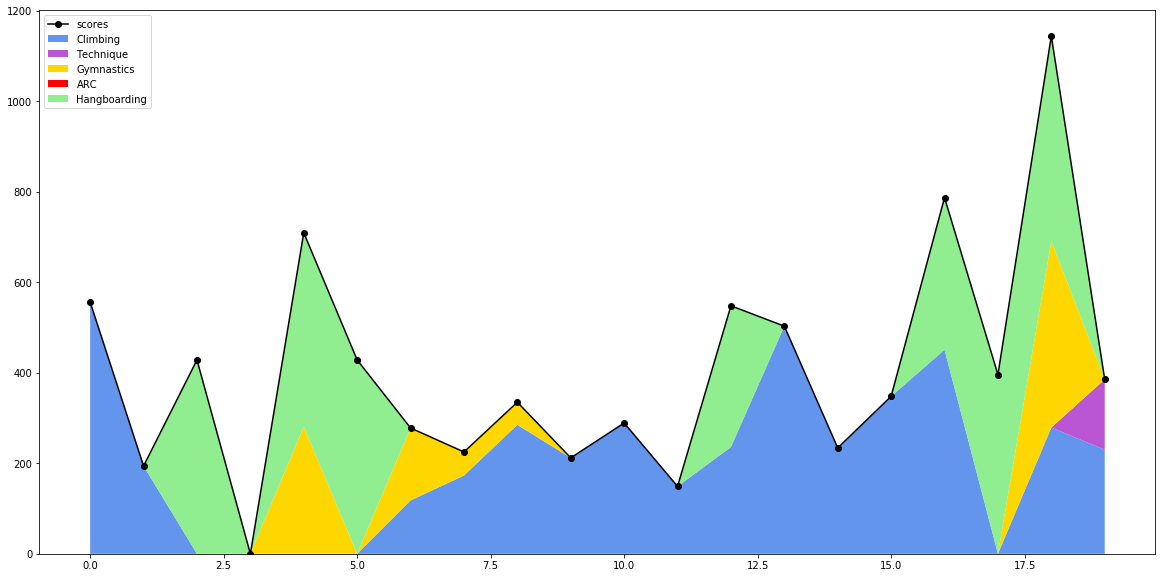

In [120]:
plt.figure(figsize=(20,10))

x = np.arange(len(sunshine_sessions))
scores = [
    sunshine_sessions.climbing_scores,
    sunshine_sessions.tech_scores,
    sunshine_sessions.gym_scores,

    sunshine_sessions.arc_scores,
    sunshine_sessions.hang_scores,
]
labels = ['Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding',  ]
colors = [ 'cornflowerblue','mediumorchid', 'gold', 'red', 'lightgreen', ]

y = np.vstack(scores)
plt.stackplot(x, y, labels=labels, colors=colors)
plt.plot(x, sunshine_sessions.scores, marker='o', color='black')
plt.legend(loc=2)
plt.show()


/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


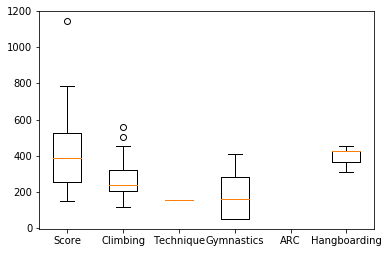

In [121]:
scores = [
    sunshine_sessions[sunshine_sessions.scores > 0].scores,
    sunshine_sessions[sunshine_sessions.climbing_scores > 0].climbing_scores,

    sunshine_sessions[sunshine_sessions.tech_scores > 0].tech_scores,
    sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores,
    sunshine_sessions[sunshine_sessions.arc_scores > 0].arc_scores,

    sunshine_sessions[sunshine_sessions.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()
# plt.boxplot(sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores)

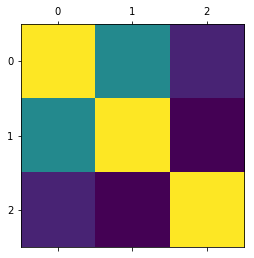

In [122]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [123]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.656090,0.415226
total6,0.656090,1.000000,0.349597
scores,0.415226,0.349597,1.000000


In [124]:
doripa['total'].corr(doripa['total6'])

0.6560900522618216

In [125]:
doripa['total'].corr(doripa['scores'])

0.41522559349211802

In [126]:
doripa['scores'].corr(doripa['total6'])

0.34959650198143694

In [127]:
sunshine_sessions.corr()['scores']

cycle              0.056167
kg                -0.043312
hang               0.594126
core               0.614957
block              0.725591
arc                     NaN
anta               0.323940
legs              -0.066520
L-Sit              0.255876
tech              -0.020264
total              0.334116
total6             0.251435
4                  0.075107
5a                 0.138371
5b                 0.547976
5c                 0.145527
6a                 0.150802
6a+                0.241234
6b                 0.155419
6b+                0.215402
6c                 0.087479
6c+                     NaN
7a                -0.195926
7a+                     NaN
4F2G               0.432744
3F2G               0.565712
16                 0.470956
12                      NaN
15°                0.573408
35°                0.661463
sloper             0.128965
pinch                   NaN
2F2G                    NaN
scores             1.000000
hang_scores        0.675467
gym_scores         0

In [128]:
doripa.corr()['scores']

cycle              0.190444
kg                -0.193162
hang               0.704950
core               0.766181
block              0.617209
arc                0.254095
anta               0.380913
legs              -0.005793
L-Sit              0.190433
tech               0.550492
total              0.415226
total6             0.349597
4                  0.158778
5a                 0.018357
5b                 0.275208
5c                 0.233948
6a                 0.230245
6a+                0.106427
6b                 0.345730
6b+                0.432579
6c                 0.015921
6c+                0.129977
7a                 0.147268
7a+               -0.096139
4F2G               0.679686
3F2G               0.707282
16                 0.294836
12                 0.627328
15°                0.191530
35°                0.655954
sloper                  NaN
pinch              0.298686
2F2G               0.127459
scores             1.000000
hang_scores        0.774524
gym_scores         0